In [27]:
import math 
import matplotlib.pyplot as plt
from src.utils.kaggle import read_data_set
from sklearn.model_selection import train_test_split


df = read_data_set("data/raw/Student_Performance.csv")

## Dataset Characteristics

| Feature                          | Definition                                                      | Unit                    |
| -------------------------------- | --------------------------------------------------------------- | ----------------------- |
| Hours Studied                    | The total number of hours spent studying by each student.       | int64                   |
| Previous Scores                  | The scores obtained by students in previous tests.              | int64                   |
| Extracurricular Activities       | Whether the student participates in extracurricular activities. | object (Yes or No)      |
| Sleep Hours                      | The average number of hours of sleep the student had per day.   | int64                   |
| Sample Question Papers Practiced | The number of sample question papers the student practiced.     | int64                   |
| **Performance Index**            | **A measure of the overall performance of each student.**       | **float64 [10 to 100]** |

[Source](https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression/data)


### Investigate `null` and duplicate


In [28]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [29]:
df.duplicated().sum()

np.int64(127)

In [30]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

### Split train and test sets


In [31]:
target_col = "Performance Index"
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(target_col, axis=1), df[target_col], test_size=0.3, random_state=42
)
print(X_train.shape, X_test.shape)

(6911, 5) (2962, 5)


### 

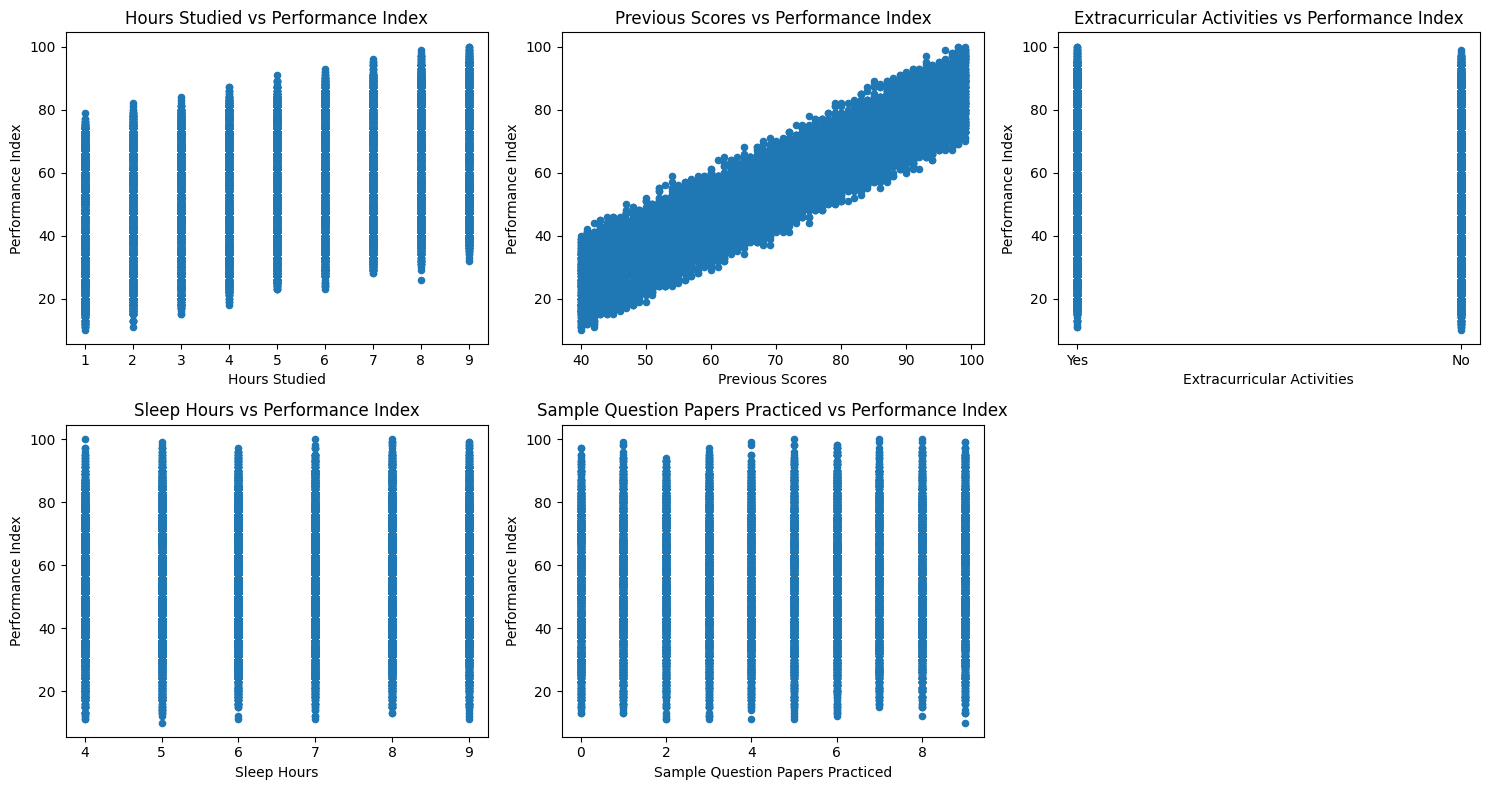

In [33]:
# plot all features based on performance index individually
features = [feature for feature in df.columns if feature != "Performance Index"]
cols = 3
rows = math.ceil(len(features) / cols)
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 4 * rows))

axes = axes.flatten()

for ax, feature in zip(axes, features):
    df.plot(
        x=feature,
        y="Performance Index",
        kind="scatter",
        title=f"{feature} vs Performance Index",
        ax=ax,
    )

# remove empty chart
fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()